# SVM 3 Classes (Healthy, COPD, Pneumonia)

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_demo = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/demographic_info.txt'

In [3]:
df_demo = pd.read_csv('C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/demographic_info.txt', names = ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                             delimiter = ' ')
df_demo.head()

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0


In [4]:
path_diag = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/patient_diagnosis.csv'
df_diag = pd.read_csv(path_diag, names = ['Patient number', 'Diagnosis'])
df_diag.head()

,Patient number,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [5]:
df =  df_demo.join(df_diag.set_index('Patient number'), on = 'Patient number', how = 'left')
df.head()

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Diagnosis
0,101,3.00,F,NaN,19.0,99.0,URTI
1,102,0.75,F,NaN,9.8,73.0,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma
3,104,70.00,F,28.47,NaN,NaN,COPD
4,105,7.00,F,NaN,32.0,135.0,URTI


In [6]:
path_data = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/audio_and_txt_files'

In [7]:
import os
from os import listdir
from os.path import isfile
from os.path import join

filenames = [f for f in listdir(path_data) if (isfile(join(path_data, f)) and f.endswith('.wav'))] 
Txt_files = [f for f in listdir(path_data) if (isfile(join(path_data, f)) and f.endswith('.txt'))]

In [8]:
def Antn_Data(file_name, root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)

In [9]:
tst_list = []
annotations = []
annotations_dict = {}
for kk in Txt_files:
    (i,a) = Antn_Data(kk, path_data)
    tst_list.append(i)
    annotations.append(a)
    annotations_dict[kk] = a
recording_info = pd.concat(tst_list, axis = 0)
recording_info.head()

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment
0,101,1b1,Al,sc,Meditron.txt
0,101,1b1,Pr,sc,Meditron.txt
0,102,1b1,Ar,sc,Meditron.txt
0,103,2b2,Ar,mc,LittC2SE.txt
0,104,1b1,Al,sc,Litt3200.txt


In [10]:
duration_list = []
for i in range(len(annotations)):
    current = annotations[i]
    duration = current['End'] - current['Start']
    duration_list.extend(duration)

longest cycle:16.163
shortest cycle:0.20000000000000284
mean cycle:2.7005090852420994
mean+std cycle:5.045407366007572



Bad key "text.kerning_factor" on line 4 in
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


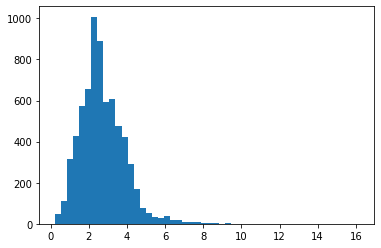

In [11]:
import matplotlib.pyplot as plt
duration_list = np.array(duration_list)
plt.hist(duration_list, bins = 50)
print('longest cycle:{}'.format(max(duration_list)))
print('shortest cycle:{}'.format(min(duration_list)))
print('mean cycle:{}'.format(np.mean(duration_list)))
print('mean+std cycle:{}'.format(np.mean(duration_list)+2*np.std(duration_list)))

In [12]:
threshold =int(np.mean(duration_list)+2*np.std(duration_list))
print('Fraction of samples less than {} seconds:{}'.format(threshold,
                                                           np.sum(duration_list < threshold)/len(duration_list)))



Fraction of samples less than 5 seconds:0.9660771238040011


In [13]:
p_id_file = [] # patient IDs corresponding to each file
for name in filenames:
    p_id_file.append(int(name[:3]))

p_id_file = np.array(p_id_file) 

p_id_cndt = {} # patient IDs corresponding to each file
for i in range(df_diag.shape[0]):
    for j in range(p_id_file.shape[0]):
        if p_id_file[j]==df_diag['Patient number'][i]:
            p_id_cndt[j]=df_diag['Diagnosis'][i]
                 
filepaths = [join(path_data, f) for f in filenames]

labels = np.array([df_diag[df_diag['Patient number'] == x]['Diagnosis'].values[0] for x in p_id_file]) # labels for audio files

In [14]:
N_Data={}
Env_data_spl={}
Row_data_spl={}
labels_new=[]
p_id_new=[]
p_cndt_new = []

len_sec=5
pcs=4

for i in range(920):

    for j in range(pcs):

        labels_new.append(labels[i])
        p_id_new.append(p_id_file[i])
        p_cndt_new.append(p_id_cndt[i])

p_id_new=np.array(p_id_new)
labels_new=np.array(labels_new)

In [15]:
#Loading features files
path= 'C:/Users/Setareh Erfani/Desktop/T_features_s.xlsx'
T_features_s=pd.read_excel(path)
T_features_s=T_features_s.iloc[:,1:T_features_s.shape[1]]
T_features_s=T_features_s.values



In [16]:
path='C:/Users/Setareh Erfani/Desktop/F_features_s.xlsx'
F_features_s=pd.read_excel(path)
F_features_s=F_features_s.iloc[:,1:F_features_s.shape[1]]
F_features_s=F_features_s.values

In [17]:
path='C:/Users/Setareh Erfani/Desktop/S_features_s.xlsx'
S_features_s=pd.read_excel(path)
S_features_s=S_features_s.iloc[:,1:S_features_s.shape[1]]
S_features_s=S_features_s.values

In [18]:
# appending copd index with patient ids

COPD_idx=[] 
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'COPD':
        COPD_idx.append(idx)

COPD_idx=np.array(COPD_idx)

# appending healthy index with patient ids

healthy=[] 
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Healthy':
        healthy.append(idx)
healthy=np.array(healthy)

# appending bronchiectasis index with patient ids

Bronchiectasis=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Bronchiectasis':
        Bronchiectasis.append(idx)

Bronchiectasis=np.array(Bronchiectasis)


# appending bronchiolitis index with patient ids

Bronchiolitis=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Bronchiolitis':
        Bronchiolitis.append(idx)

Bronchiolitis=np.array(Bronchiolitis)

# appending pneumonia index with patient ids

Pneumonia=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Pneumonia':
        Pneumonia.append(idx)

Pneumonia=np.array(Pneumonia)

# appending lower respiratory tract infection index with patient ids

LRTI=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'LRTI':
        LRTI.append(idx)

LRTI=np.array(LRTI)


# appending upper respiratory tract infection index with patient ids

URTI=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'URTI':
        URTI.append(idx)

URTI=np.array(URTI)

# SVM 3 Classes


In [19]:
def Unvr_FS(Features,label,N_F):
    
    X=Features
    y=label
    #Univariate Feature Selection
    # Split dataset to select feature and evaluate the classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.75,
                                                        stratify=y, random_state=0)
    plt.figure(1)
    plt.clf()
    
    X_indices = np.arange(X.shape[-1])
    selector = SelectKBest(f_classif, N_F)
    selector.fit(X_train, y_train)
    scores = -np.log10(selector.pvalues_)
    features_score = scores/max(scores)
    # Compare to the weights of an SVM
    clf = make_pipeline(MinMaxScaler(), LinearSVC())
    clf.fit(X_train, y_train)
    print('Classification accuracy befor univariate feature selection: {:.3f}'
          .format(clf.score(X_test, y_test)))
    pred_n = clf.predict(X_test)
    svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
    svm_weights /= svm_weights.sum()
    svm_weights=svm_weights/max(svm_weights)
    plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='black', edgecolor='black')
    clf_selected = make_pipeline(SelectKBest(f_classif, N_F), MinMaxScaler(), LinearSVC())
    clf_selected.fit(X_train, y_train)
    pred_fs = clf_selected.predict(X_test)
    print('Classification accuracy after univariate feature selection: {:.3f}'
          .format(clf_selected.score(X_test, y_test)))
    svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
    svm_weights_selected /= svm_weights_selected.sum()
    svm_weights_selected=svm_weights_selected/max(svm_weights_selected)
    plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
            width=.2, label='SVM weights after selection', color='blue', edgecolor='blue')
    plt.title("Comparing feature selection")
    plt.xlabel('Feature index')
    plt.ylabel('Normalized feature Score')
    plt.yticks(())
    plt.axis('tight')
    plt.legend(loc='upper right')
    plt.show()
    
    return features_score,y_test,pred_n,pred_fs



In [21]:
path_s_features_s = 'C:/Users/Setareh Erfani/Desktop/S_features_s.xlsx'

S_features_s=pd.read_excel(path_s_features_s)
S_features_s=S_features_s.iloc[:,1:S_features_s.shape[1]]
S_features_s=S_features_s.values



In [22]:
goal_features=S_features_s
goal_labels=np.array(labels_new)

In [23]:
c_names = [ 'Healthy', 'COPD', 'Pneumonia']
num_clss = len(c_names)

N_smpls=140
N_features=goal_features.shape[1]

In [24]:
COPD_idx=[] 

for idx in range(len(p_id_new)):

    if p_cndt_new[idx] == 'COPD':

        COPD_idx.append(idx)



COPD_idx=np.array(COPD_idx)


healthy=[] 

for idx in range(len(p_id_new)):

    if p_cndt_new[idx] == 'Healthy':

        healthy.append(idx)

        

healthy=np.array(healthy)


Pneumonia=[]      

for idx in range(len(p_id_new)):

    if p_cndt_new[idx] == 'Pneumonia':

        Pneumonia.append(idx)



Pneumonia=np.array(Pneumonia)

In [25]:
healthy_sample=goal_features[healthy,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=0*np.ones(healthy_sample.shape[0])

copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])


Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=2*np.ones(Pneumonia_sample.shape[0])

In [26]:
all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))
  
i_labels_n=np.hstack((l_h,c_h,pn_h))
Labels_eq=pd.DataFrame(['healthy','copd','Pneumonia']) 

[[  0.   1.   2.]
 [140. 140. 140.]]


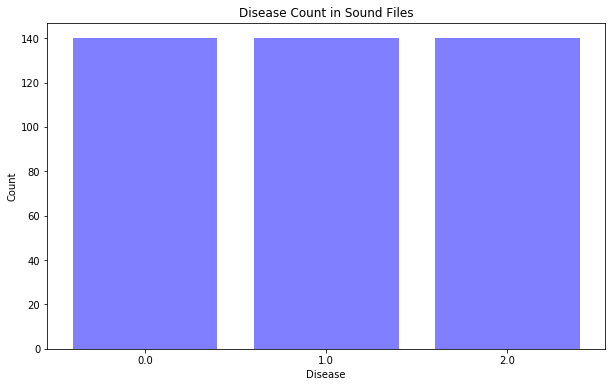

In [27]:
unique_elements, counts_elements = np.unique(i_labels_n, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
#plot the quantity of conditions
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(10,6))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files')
plt.show()


In [28]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
i_labels = le.fit_transform(goal_labels)

Using TensorFlow backend.


C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [403 787] are constant.
  UserWarning)
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification accuracy befor univariate feature selection: 0.762


C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [403 787] are constant.
  UserWarning)
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification accuracy after univariate feature selection: 0.829


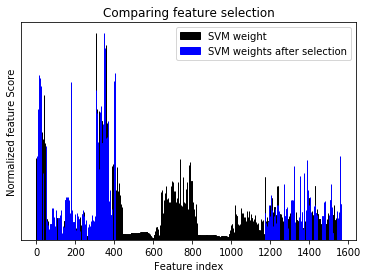

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


feat_score,y_test,pred_n,pred_fs=Unvr_FS(all_feats,i_labels_n,500)


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_n))
print(confusion_matrix(y_test, pred_fs))


[[24  2  9]
 [ 2 29  4]
 [ 6  2 27]]
[[28  0  7]
 [ 2 29  4]
 [ 3  2 30]]
